In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()

print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: 


In [ ]:
import numpy as np
import pandas as pd
import math
import sklearn
import seaborn as sns
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

/: ['usr', 'home', 'sys', 'bin', 'mnt', 'proc', 'media', 'tmp', 'root', 'opt', 'etc', 'dev', 'var', 'lib', 'srv', 'sbin', 'lib64', 'run', 'boot', 'content', '.dockerenv', 'datalab', 'tools', 'python-apt', 'lib32', 'NGC-DL-CONTAINER-LICENSE']
/content: ['.config', 'Supermart Grocery Sales - Retail Analytics Dataset.csv', 'sample_data']


In [ ]:
df=pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [ ]:
df.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4/17/2018,West,1034,0.28,165.44,Tamil Nadu


In [ ]:
df.State.unique()

array(['Tamil Nadu'], dtype=object)

In [ ]:
df.City.nunique()

24

In [ ]:
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


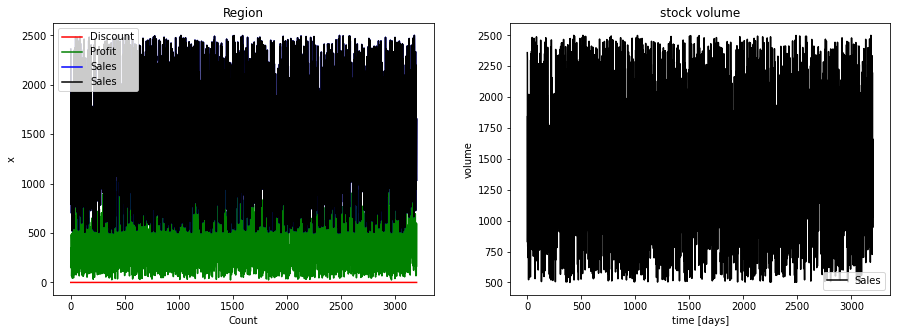

In [ ]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.Region == 'West'].Discount.values, color='red', label='Discount')
plt.plot(df[df.Region == 'West'].Profit.values, color='green', label='Profit')
plt.plot(df[df.Region == 'West'].Sales.values, color='blue', label='Sales')
plt.plot(df[df.Region == 'West'].Sales.values, color='black', label='Sales')
plt.title('Region')
plt.xlabel('Count')
plt.ylabel('x')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df[df.Region == 'West'].Sales.values, color='black', label='Sales')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

Text(0.5, 1.0, 'Profit Percentage per Category')

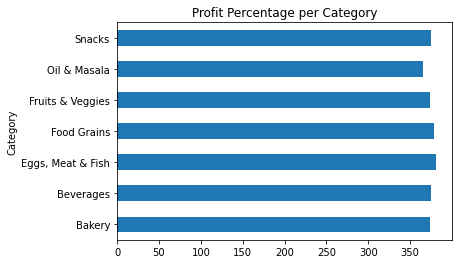

In [ ]:
df.groupby("Category").mean()["Profit"].plot(kind='barh')
plt.title("Profit Percentage per Category")

Text(0.5, 1.0, 'Avg Sales/Profit based on Region')

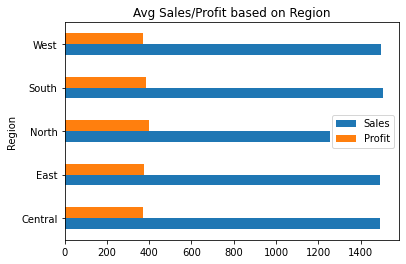

In [ ]:
df.groupby("Region")[["Sales", "Profit"]].mean().plot(kind="barh")
plt.title("Avg Sales/Profit based on Region")

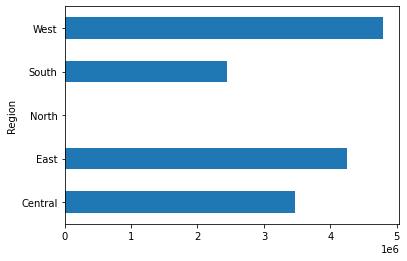

In [ ]:
df.groupby("Region")["Sales"].sum().plot(kind="barh")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


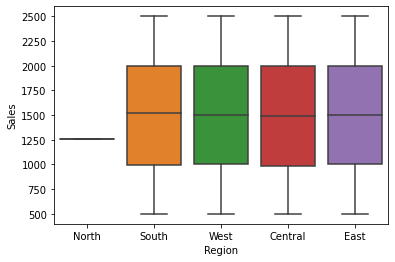

In [ ]:
sns.boxplot(df.Region, df.Sales)

Text(0.5, 1.0, 'Profit/ Sales over the time based on cities')

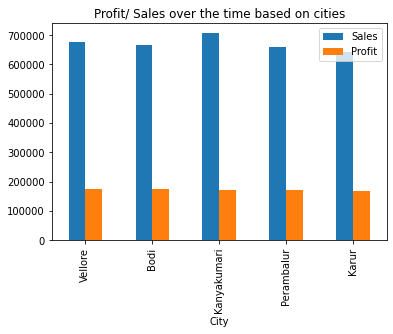

In [ ]:
df.groupby("City")[["Sales", "Profit"]].sum().sort_values(by="Profit",ascending=False).head().plot(kind="bar")  
plt.title("Profit/ Sales over the time based on cities")

Text(0.5, 1.0, 'Avg Profit/Sales based on cities')

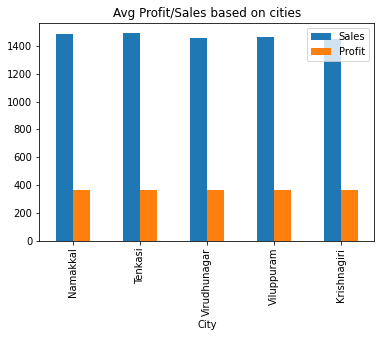

In [ ]:
df.groupby("City")[["Sales", "Profit"]].mean().sort_values(by="Profit",ascending=True).head().plot(kind="bar")
plt.title("Avg Profit/Sales based on cities")

In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [ ]:
df["Year"] = df["Order Date"].dt.year

Text(0.5, 1.0, 'Profit by Years')

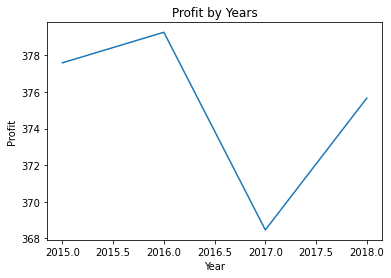

In [ ]:
plt.plot(df.groupby("Year")["Profit"].mean())
plt.xlabel("Year")
plt.ylabel("Profit")
plt.title("Profit by Years")

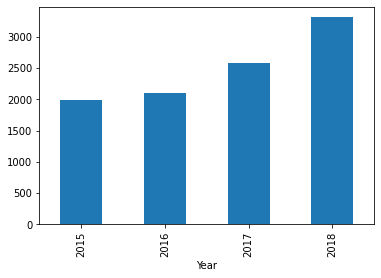

In [ ]:
df.groupby("Year")["Sales"].count().plot(kind="bar")

In [ ]:
df.groupby("Customer Name")["Year"].count().sort_values(ascending=False).head(10)

Customer Name
Amrish      227
Krithika    224
Verma       218
Arutra      218
Vidya       215
Shah        215
Suresh      212
Surya       209
Harish      208
Hussain     208
Name: Year, dtype: int64

Text(0.5, 1.0, "Top 3 Customer's contribution")

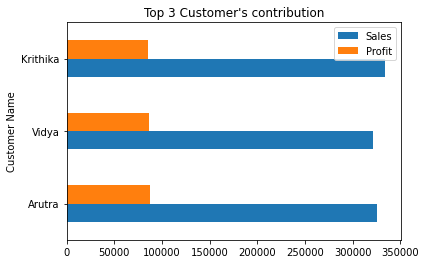

In [ ]:
df.groupby("Customer Name")[["Sales", "Profit"]].sum().sort_values(by="Profit",ascending=False).head(3).plot(kind="barh").plot(kind="barh")
plt.title("Top 3 Customer's contribution")

Text(0.5, 1.0, 'Cities with most sales over the time.')

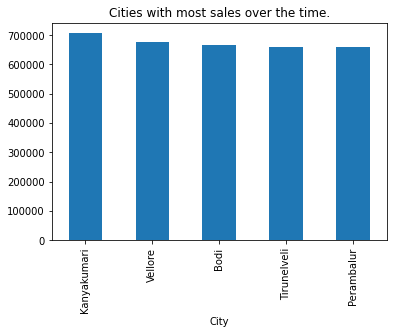

In [ ]:
df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(5).plot(kind="bar")
plt.title("Cities with most sales over the time.")

Text(0.5, 1.0, 'Cities with highest avg Sales')

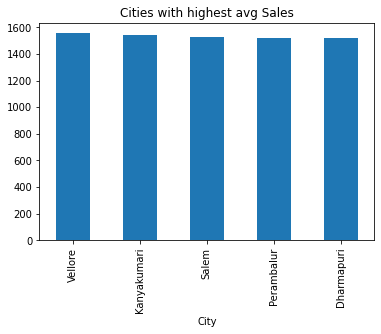

In [ ]:
df.groupby("City")["Sales"].mean().sort_values(ascending=False).head(5).plot(kind="bar")
plt.title("Cities with highest avg Sales")

Text(0.5, 1.0, 'Cities with lowest avg Profit')

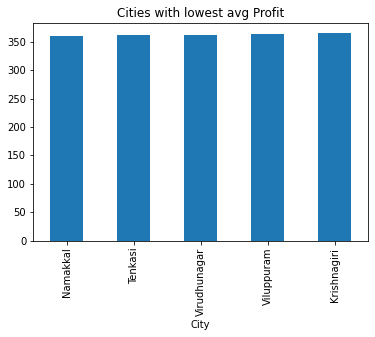

In [ ]:
df.groupby("City")["Profit"].mean().sort_values(ascending=True).head(5).plot(kind="bar")
plt.title("Cities with lowest avg Profit")

Text(0.5, 1.0, 'Profit by Category')

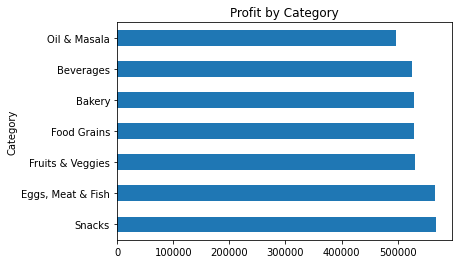

In [ ]:
df.groupby("Category")["Profit"].sum().sort_values(ascending=False).plot(kind="barh")
plt.title("Profit by Category")

Text(0.5, 1.0, 'Discounts on categories')

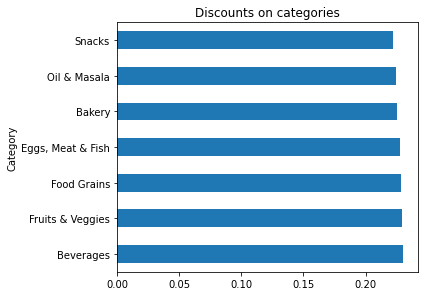

In [ ]:
df.groupby("Category")["Discount"].mean().sort_values(ascending=False).plot(kind="barh")
plt.tight_layout()
plt.title("Discounts on categories")

In [ ]:
df.groupby("Category")["Profit"].mean().sort_values(ascending=True)

Category
Oil & Masala         365.830485
Bakery               374.041798
Fruits & Veggies     374.048223
Snacks               375.283256
Beverages            375.432686
Food Grains          378.514049
Eggs, Meat & Fish    380.776658
Name: Profit, dtype: float64

In [ ]:
df = df.drop(columns=['Order ID', 'Order Date'], axis=1)

In [ ]:
df = pd.get_dummies(df)
df

,Sales,Discount,Profit,Year,Customer Name_Adavan,Customer Name_Aditi,Customer Name_Akash,Customer Name_Alan,Customer Name_Amrish,Customer Name_Amy,...,City_Trichy,City_Vellore,City_Viluppuram,City_Virudhunagar,Region_Central,Region_East,Region_North,Region_South,Region_West,State_Tamil Nadu
0,1254,0.12,401.28,2017,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,749,0.18,149.80,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2360,0.21,165.20,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,896,0.25,89.60,2016,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,2355,0.26,918.45,2016,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,945,0.16,359.10,2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9990,1195,0.26,71.70,2015,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
9991,1567,0.16,501.44,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9992,1659,0.15,597.24,2018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
df.describe()

,Sales,Discount,Profit,Year,Customer Name_Adavan,Customer Name_Aditi,Customer Name_Akash,Customer Name_Alan,Customer Name_Amrish,Customer Name_Amy,...,City_Trichy,City_Vellore,City_Viluppuram,City_Virudhunagar,Region_Central,Region_East,Region_North,Region_South,Region_West,State_Tamil Nadu
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,...,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.0
mean,1496.596158,0.226817,374.937082,2016.722233,0.020512,0.018711,0.019612,0.019812,0.022714,0.019612,...,0.035721,0.043526,0.039724,0.041625,0.232439,0.284971,0.000100,0.161997,0.320492,1.0
std,577.559036,0.074636,239.932881,1.123555,0.141752,0.135510,0.138669,0.139360,0.148996,0.138669,...,0.185604,0.204048,0.195319,0.199741,0.422409,0.451423,0.010003,0.368467,0.466689,0.0
min,500.000000,0.100000,25.250000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1000.000000,0.160000,180.022500,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1498.000000,0.230000,320.780000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,1994.750000,0.290000,525.627500,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.0
max,2500.000000,0.350000,1120.950000,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
print('\nnumber of different stocks: ', len(list(set(df))))
print(list(set(df))[:10])


number of different stocks:  114
['City_Theni', 'Sales', 'Discount', 'Sub Category_Soft Drinks', 'City_Coimbatore', 'Sub Category_Masalas', 'Sub Category_Organic Fruits', 'Customer Name_Rumaiza', 'City_Chennai', 'Customer Name_Yadav']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Columns: 114 entries, Sales to State_Tamil Nadu
dtypes: float64(2), int64(2), uint8(110)
memory usage: 1.4 MB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x =df.drop("Region_West", axis=1)
y = df['Region_West']

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn import linear_model

#train model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#uji akurasi model
model.score(x_test, y_test)

0.9996665555185061